In [1]:
# pip install gensim

In [2]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to C:\Users\Administrator.DAI-
[nltk_data]     PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import gensim
import json
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import abc, stopwords
from textblob import Word
from nltk.tokenize import word_tokenize


In [4]:
sentences = ["The quick brown fox jumps over the lazy dog.",
            "I like eating apples and bananas.",
            "Natural Language processing is a fascinating field."]

In [5]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [6]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'Language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [7]:
model = Word2Vec(final_data, min_count=1, vector_size=10)

In [8]:
model.wv['apples']

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [9]:
model.wv['bananas']

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [10]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        print(f"Word embedding for '{word}': {word_embedding}")
    except KeyError:
        print(f"Word '{word}' not found in vocabulary.")

In [11]:
get_embedding('apples')

Word embedding for 'apples': [ 0.07898068 -0.06989504 -0.09155865 -0.00355753 -0.03099841  0.07894317
  0.05938574 -0.01545663  0.01510963  0.01790041]


In [12]:
get_embedding('oranges')

Word 'oranges' not found in vocabulary.


In [13]:
cosine_similarity(model.wv['apples'].reshape(1,-1),
                  model.wv['bananas'].reshape(1,-1))

array([[0.18977958]], dtype=float32)

In [14]:
sents = abc.sents()
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [15]:
len(sents)

29059

In [16]:
model = Word2Vec(sents, min_count=1, vector_size=10)

model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [17]:
len(model.wv.key_to_index)

31885

In [18]:
data = model.wv.most_similar('science')
data

[('authority', 0.9830346703529358),
 ('capitalise', 0.9744834899902344),
 ('Dubbo', 0.9722638130187988),
 ('arousal', 0.9707796573638916),
 ('Hofmann', 0.9698483347892761),
 ('leading', 0.9696303606033325),
 ('Women', 0.9654154777526855),
 ('nurse', 0.9651150703430176),
 ('bulk', 0.9643692374229431),
 ('publisher', 0.9623361825942993)]

In [19]:
data = model.wv.most_similar('publisher')
data

[('science', 0.9623363614082336),
 ('Dubbo', 0.95712810754776),
 ('slash', 0.9569029211997986),
 ('earth', 0.9565849900245667),
 ('tanning', 0.9548500776290894),
 ('eliminating', 0.9547627568244934),
 ('Parkinson', 0.9521740674972534),
 ('glands', 0.9511765837669373),
 ('capitalise', 0.948617696762085),
 ('triple', 0.9482361078262329)]

In [20]:
model.wv['science'], model.wv['publisher']

(array([ 0.13923068,  0.14438264,  2.3035963 ,  0.05482432, -0.3669222 ,
        -0.61131495,  1.7266495 ,  1.1276013 , -1.3811526 , -0.4028779 ],
       dtype=float32),
 array([-0.00051211, -0.01233049,  0.2171395 ,  0.02553782, -0.08150501,
        -0.07379478,  0.16011247,  0.04759662, -0.16123056, -0.0614132 ],
       dtype=float32))

In [21]:
cosine_similarity(model.wv['science'].reshape(1,-1),
                  model.wv['publisher'].reshape(1,-1))

array([[0.96233624]], dtype=float32)

## Read the data and train Word2Vec



In [22]:
with open('intents.json','r') as f:
    data = json.load(f)

In [23]:
type(data)

list

In [24]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [25]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [26]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [27]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [28]:
df=pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [29]:
df['patterns']

0    [Hi, How are you, Is any one to talk?, Hello, ...
1    [Bye, See you later, Goodbye, I will come back...
2    [Thanks for helping me, Thank your guidance, T...
3    [What hours are you open?, Tell your opening t...
4    [Can I pay using credit card?,  Can I pay usin...
Name: patterns, dtype: object

In [30]:
df['patterns'][3]

['What hours are you open?',
 'Tell your opening time?',
 'When are you open?',
 'Just your timing please']

In [31]:
df['patterns'] = df['patterns'].apply(', '.join)

In [32]:
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","[See you later, thanks for visiting, have a gr..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"Can I pay using credit card?, Can I pay using...","[We accept VISA, Mastercard and credit card, W..."


In [33]:
stop = stopwords.words('english')

In [34]:
df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(x.lower() for x in word_tokenize(x)))
df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(x.lower() for x in word_tokenize(x) if x not in string.punctuation))
df['patterns'] = df['patterns'].str.replace('[^\w\s]','')
df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(x.lower() for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(x.lower() for x in word_tokenize(x) if not x in stop))
df['patterns'] = df['patterns'].apply(
    lambda x: " ".join([Word(word).lemmatize(pos='v') for word in word_tokenize(x)]))

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_20424\2221480603.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['patterns'] = df['patterns'].str.replace('[^\w\s]','')


In [35]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [36]:
w = Word('playing')
w.lemmatize(pos='v')

'play'

In [37]:
w.stem()

'play'

In [38]:
w.translate('ge')

'playing'

In [39]:
#taking the outer list
biggest_list = []
for i in df['patterns']:
    li = i.split()
    biggest_list.append(li)

In [40]:
biggest_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [41]:
# custom data is fed to machine for further processing
model = Word2Vec(biggest_list, min_count=1, vector_size=2) 
print(model)

Word2Vec<vocab=28, vector_size=2, alpha=0.025>


In [42]:
model.wv['hi']

array([0.3229368 , 0.44868633], dtype=float32)

In [43]:
model.wv['hello']

array([-0.41426075, -0.4724409 ], dtype=float32)

In [44]:
model.wv['hours']

array([-0.001755  , -0.01480907], dtype=float32)

In [45]:
model.wv.key_to_index.keys()

dict_keys(['use', 'pay', 'open', 'hi', 'time', 'thank', 'back', 'one', 'talk', 'hello', 'available', 'bye', 'see', 'later', 'goodbye', 'come', 'cash', 'soon', 'mastercard', 'guidance', 'helpful', 'kind', 'hours', 'tell', 'please', 'credit', 'card', 'help'])

In [46]:
words = list(model.wv.key_to_index.keys())

In [47]:
vectors=[]
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))

vectors

[[-0.026751734, 0.012281133],
 [0.25523767, 0.4506055],
 [-0.4651475, -0.35584044],
 [0.3229368, 0.44868633],
 [-0.2507714, -0.18816859],
 [0.36902523, -0.07667357],
 [-0.22684607, 0.32776347],
 [-0.24299842, -0.09077801],
 [0.14382899, 0.049593687],
 [-0.41426075, -0.4724409],
 [0.3655883, 0.2535131],
 [0.33788466, 0.038143277],
 [0.31754452, -0.1702683],
 [-0.0472956, 0.2884862],
 [-0.37608188, -0.19680518],
 [-0.37557912, -0.046502113],
 [0.47690594, -0.36595833],
 [-0.11668843, -0.09688705],
 [0.4038734, -0.29645923],
 [0.002235218, -0.23763835],
 [-0.48017752, 0.25036466],
 [-0.43797958, -0.21955584],
 [-0.0017549992, -0.014809072],
 [-0.383062, 0.48073715],
 [0.24910289, 0.46165717],
 [-0.40792263, 0.22502917],
 [-0.20681228, 0.041463476],
 [0.424931, -0.22310883]]

In [48]:
vectors = pd.DataFrame(vectors, columns=['x','y'])
vectors

,x,y
0,-0.026752,0.012281
1,0.255238,0.450606
2,-0.465147,-0.355840
3,0.322937,0.448686
4,-0.250771,-0.188169
5,0.369025,-0.076674
6,-0.226846,0.327763
7,-0.242998,-0.090778
8,0.143829,0.049594
9,-0.414261,-0.472441


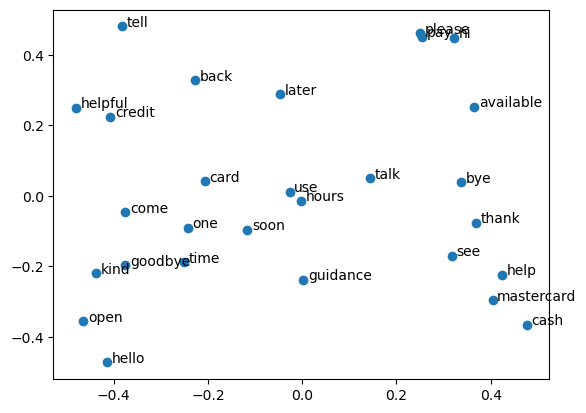

In [49]:
plt.scatter(vectors['x'], vectors['y'])
for i in  range(len(words)):
    plt.annotate(xy = (vectors.loc[i,'x']+0.01, vectors.loc[i,'y']), text=words[i])

In [50]:
cosine_similarity(model.wv['tell'].reshape(1,-1),
                 model.wv['mastercard'].reshape(1,-1))

array([[-0.965148]], dtype=float32)

In [51]:
model.wv.most_similar('help', topn=5)

[('see', 0.9999620318412781),
 ('mastercard', 0.988812267780304),
 ('cash', 0.9854090809822083),
 ('thank', 0.9614343643188477),
 ('bye', 0.8276455402374268)]

In [52]:
dissmilar_words = model.wv.doesnt_match(
    '''see you later, thanks for visiting'''.split())
print(dissmilar_words)

see
